# CRISP DM

In [ ]:
Bussines Understanding

- Problem
Kanker paru-paru adalah kondisi yang disebabkan oleh berbagai faktor, tetapi faktor utamanya
adalah merokok. Namun apakah perokok akan mengidap kanker paru-paru atau tidak. Dalam dataset ini
berisi data-data orang yang memiliki gejala kanker paru-paru.

- Tujuan
Dataset ini diambil dari Kaggle (https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer)
bertujuan untuk menganalisis, memprediksi dan membantu masyarakat untuk mengetahui risiko
kanker mereka dengan biaya rendah dan juga membantu masyarakat untuk mengambil keputusan yang
tepat berdasarkan status risiko kanker mereka.

In [ ]:
Data Understanding

Dataset ini terdiri dari 6 kolom yang berisi 1 kolom float64, 1 kolom int64 dan 4 kolom objek.
Berikut atribut-atributnya :

0. GENDER = jenis kelamin (objek)
1. AGE = umur (int64) 
2. SMOKING = perokok (int64) 
3. YELLOW_FINGERS = jari kuning (int64) 
4. ANXIETY = kecemasan pasien (int64) 
5. PEER_PRESSURE = pengaruh dari teman (int64) 
6. CHRONIC DISEASE = penyakit kronis (int64) 
7. FATIGUE = kelelahan (int64) 
8. ALLERGY = alergi (int64) 
9. WHEEZING = mengi (suara bernada tinggi yang dihasilkan saat bernapas) (int64) 
10. ALCOHOL CONSUMING = mengkonsumsi minuman keras (int64) 
11. COUGHING = batuk (int64) 
12. SHORTNESS OF BREATH = sesak nafas (int64) 
13. SWALLOWING DIFFICULTY = sulit menelan (int64) 
14. CHEST PAIN = nyeri dada (int64) 
15. LUNG_CANCER = kanker paru-paru (objek)

In [ ]:
Data Preparation

Untuk fitur, data yang digunakan yaitu: 
1. SMOKING
2. YELLOW_FINGERS 
3. ANXIETY 
4. PEER_PRESSURE 
5. CHRONIC DISEASE 
6. FATIGUE
7. ALLERGY 
8. WHEEZING 
9. ALCOHOL CONSUMING 
10. COUGHING
11. SHORTNESS OF BREATH
12. SWALLOWING DIFFICULTY
13. CHEST PAIN

Sedangkan, yang menjadi target yaitu LUNG_CANCER

In [ ]:
Modeling

Model yang digunakan yaitu Decision Tree Classifier atau pohon keputusan

In [ ]:
Evaluation

Evaluasi dilakukan dengan cara menguji data testing dengan data training.

In [ ]:
Deployment

Deployment dilakukan dengan menggunakan GitHub sebagai tempat menyimpan source code yang telah
dibuat dan Streamlit Share untuk mengaplikasikan source code yang telah diunggah di GitHub

# Import library

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import  train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("survey lung cancer.csv")

In [3]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [23]:
ind_col = [col for col in df.columns != 'LUNG_CANCER']
def_col = 'LUNG_CANCER'

# Transformasi Data

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['LUNG_CANCER'] = le.fit_transform(df['LUNG_CANCER'])

In [6]:
df.to_csv('paru-paru.csv')

In [7]:
df['LUNG_CANCER'].value_counts()

LUNG_CANCER
1    270
0     39
Name: count, dtype: int64

In [8]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


# Split data

In [9]:
X = df.drop(columns=['GENDER', 'AGE', 'LUNG_CANCER'], axis=1)
Y = df['LUNG_CANCER']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [11]:
print(X.shape, x_train.shape, x_test.shape)

(309, 13) (247, 13) (62, 13)


# Membuat model training

In [24]:
dtc = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0,
    random_state=42, splitter='best'
)

In [25]:
model = dtc.fit(x_train, y_train)

# Visualisasi Data

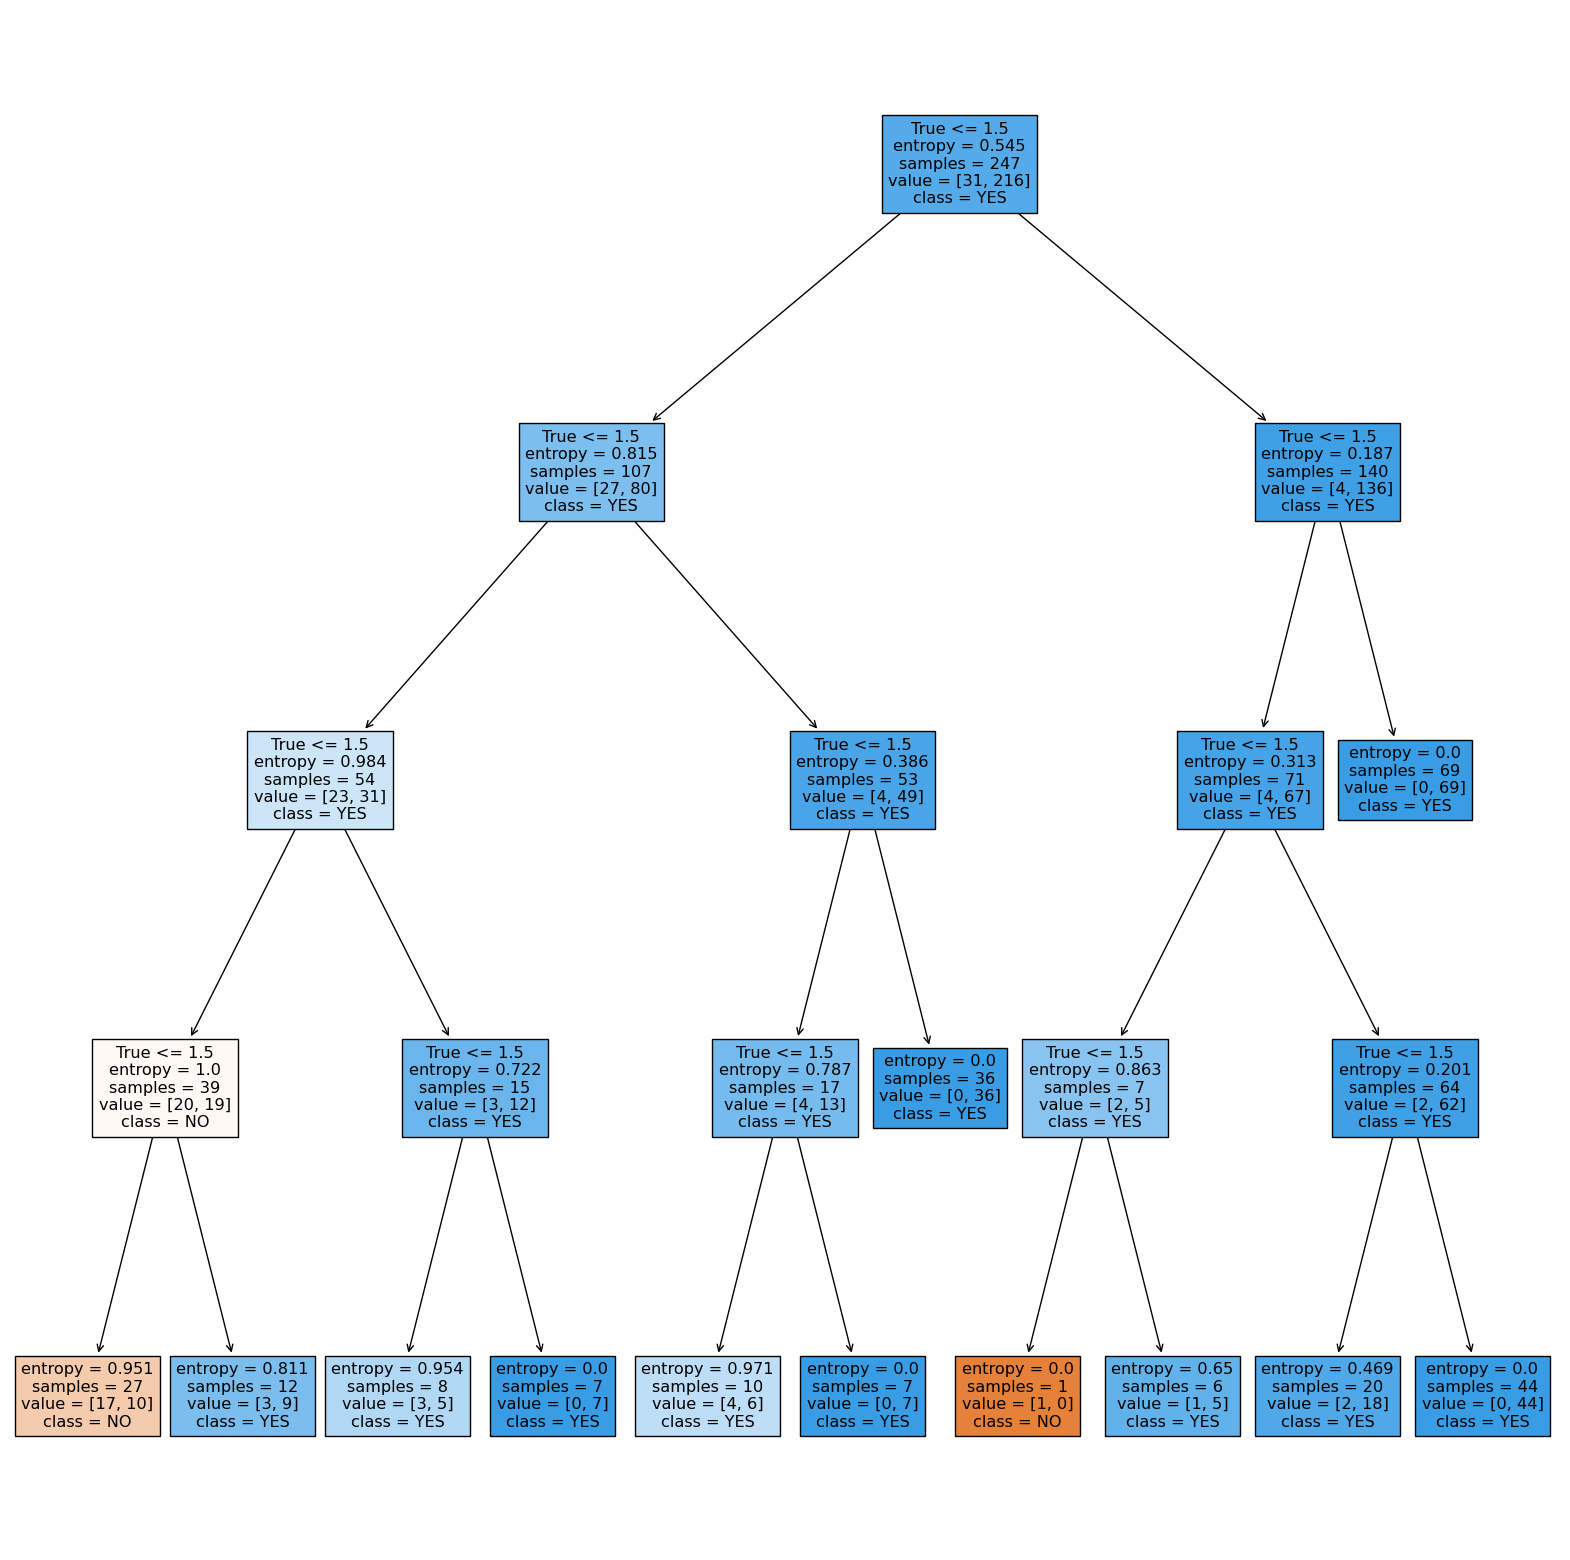

In [28]:
fig = plt.figure(figsize=(20, 20))
_ = tree.plot_tree(
    model,
    feature_names = ind_col,
    class_names = ['NO', 'YES'],
    filled = True)

# Evaluasi model

In [29]:
x_train_predict = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_predict, y_train)

In [30]:
print('Akurasi data training : ', training_data_accuracy)

Akurasi data training :  0.9068825910931174


In [31]:
x_test_predict = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_predict, y_test)

In [32]:
print('Akurasi data testing : ', test_data_accuracy)

Akurasi data testing :  0.8709677419354839


# Model Prediksi

In [33]:
input_data = (2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2)
input_data_numpy = np.asarray(input_data)
data_reshaped = input_data_numpy.reshape(1, -1)
prediksi = model.predict(data_reshaped)
print(prediksi)

if (prediksi[0] == 1):
    print('Pasien Terkena Kanker Paru-paru')
else:
    print('Pasien Tidak Terkena Kanker Paru-paru')

[1]
Pasien Terkena Kanker Paru-paru


c:\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Save Model

In [34]:
import pickle

filename = 'lung_cancer.sav'
pickle.dump(model, open(filename, 'wb'))